In [1]:
import numpy as np, copy
import matplotlib.pyplot as plt
import matplotlib.lines as ml
%matplotlib inline
import matplotlib.patheffects as PathEffects
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# List of models, with column information

M40_F0.data  |  M40_F27.data  | M40_F28.data  | M40_F29.data |  M40_F30.data |  M40_F31.data
--- | --- | ---
M40_F0+LBV.data | | | | |
M60_F0.data  |  M60_F27.data  | M60_F28.data |  M60_F29.data |  M60_F30.data |  M60_F31.data
M60_F0+LBV.data | | | | |
M80_F0.data  |  M80_F27.data |  M80_F28.data |  M80_F29.data  | M80_F30.data |  M80_F31.data
M80_F0 2 - 4 (?) | M80_F0 2 (?) | | | |
M80_F0+LBV.data | | | | |

star_age <br>
star_mass <br>
star_mdot <br>
log_Teff <br>
log_L <br>
log_R <br>
log_g <br>
center_h1 <br>
Bp <br>
vesc <br>
vinf <br>
etastar <br>
Ra <br>
Rc <br>
f <br>

# Some useful functions

In [2]:
def read_model(file):

    cols = np.array([2,3,4,6,11,12,13,24,45,46,47,48,49,50,51])-1
    return np.genfromtxt(file, skip_header=5, names=True, usecols = cols)

In [3]:
def data_lines(x, y, z, min_col, max_col, cmap):
    points = np.array([x, y]).T.reshape(-1, 1, 2)

    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=plt.get_cmap(cmap),
                    norm=plt.Normalize(min_col, max_col))
    lc.set_array(z)
    lc.set_linewidth(2)
    
    return lc

# Gathering the upper limits (final values, and values at a fixed core H fraction)

In [95]:
# Gather the limits. 

models = ['M40_F0.data','M40_F27.data','M40_F28.data','M40_F29.data','M40_F30.data','M40_F31.data',
          'M60_F0.data','M60_F27.data','M60_F28.data','M60_F29.data','M60_F30.data','M60_F31.data',
          'M80_F0.data', 'M80_F27.data','M80_F28.data','M80_F29.data','M80_F30.data']


#models = ['M40_F0.data', 'M40_F27.data']

initial_mass = np.zeros(len(models))
final_mass = np.zeros(len(models))
final_age = np.zeros(len(models))
final_Hcenter = np.zeros(len(models))

mass_atH = np.zeros(len(models))
temp_atH = np.zeros(len(models))
lum_atH  = np.zeros(len(models))
age_atH = np.zeros(len(models))

for item in range(0, len(models)):
    
    data = read_model(models[item])
    
    initial_mass[item] = data['star_mass'][0]
    final_mass[item] = data['star_mass'][data.size-1]
    final_age[item] = data['star_age'][data.size-1]
    final_Hcenter[item] = data['center_h1'][data.size-1]
    
    n = np.where(data['center_h1'] < 0.15)
    #print n[0][0], data['center_h1'][n[0][0]]
    mass_atH[item] = data['star_mass'][n[0][0]]
    temp_atH[item] = data['log_Teff'][n[0][0]]
    lum_atH[item] = data['log_L'][n[0][0]]
    age_atH[item] = data['star_age'][n[0][0]]


# Comparisons between various models

### LBV vs non-LBV for 60 $M_\odot$ and 80 $M_\odot$

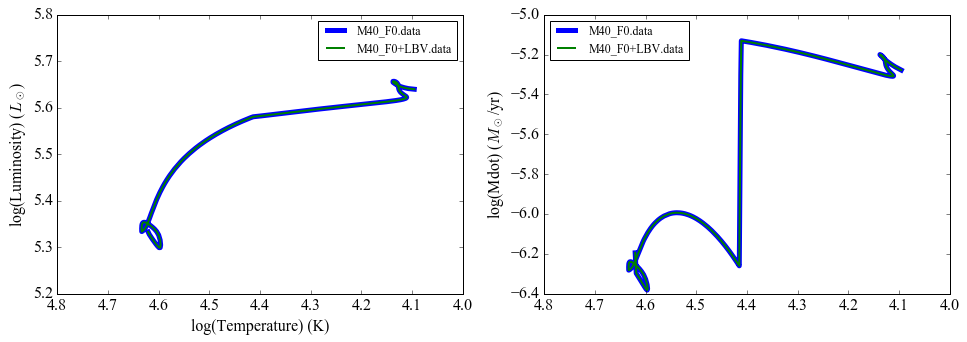

In [63]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'Times New Roman'})

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[0].set_xlabel('log(Temperature) (K)')
ax[0].set_ylabel('log(Luminosity) ($L_\odot$)')
ax[1].set_ylabel('log(Mdot) ($M_\odot$/yr)')

for item in ax:
    item.set_xlim(4.8,4)
ax[0].set_ylim(5.2,5.8)

models = ['M40_F0.data', 'M40_F0+LBV.data']
lw = [5,2]

for item in range(0, len(models)):
    
    data = read_model(models[item]) 
    ax[0].plot(data['log_Teff'], data['log_L'], label=models[item], lw=lw[item], alpha=1)
    ax[1].plot(data['log_Teff'],np.log10(np.absolute(data['star_mdot'])),label=models[item], lw=lw[item], alpha=1)

for item in ax:
    item.legend(fontsize=12, loc=0)

No differences

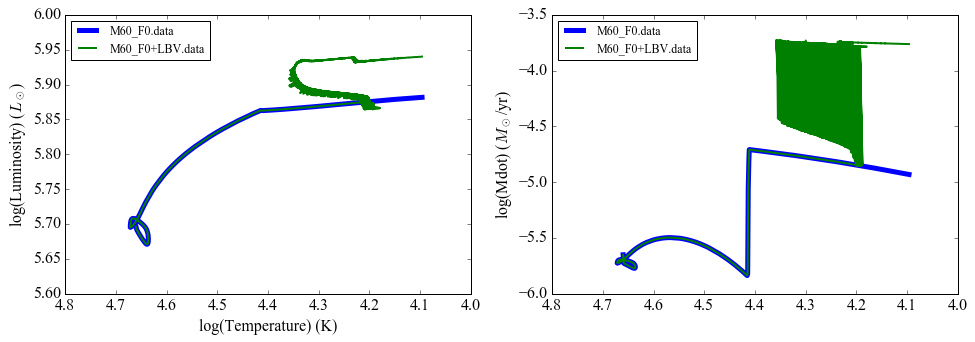

In [64]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'Times New Roman'})

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[0].set_xlabel('log(Temperature) (K)')
ax[0].set_ylabel('log(Luminosity) ($L_\odot$)')
ax[1].set_ylabel('log(Mdot) ($M_\odot$/yr)')

for item in ax:
    item.set_xlim(4.8,4)
ax[0].set_ylim(5.6,6.0)

models = ['M60_F0.data', 'M60_F0+LBV.data']
lw = [5,2]

for item in range(0, len(models)):
    
    data = read_model(models[item])
    ax[0].plot(data['log_Teff'], data['log_L'], label=models[item], lw=lw[item], alpha=1)
    ax[1].plot(data['log_Teff'],np.log10(np.absolute(data['star_mdot'])),label=models[item], lw=lw[item], alpha=1)

for item in ax:
    item.legend(fontsize=12, loc=0)

LBV mass-loss is kicking in. The same is also true for the 80 $M_\odot$ model

### Comparison between the 4 sets of 80 $M_\odot$ models

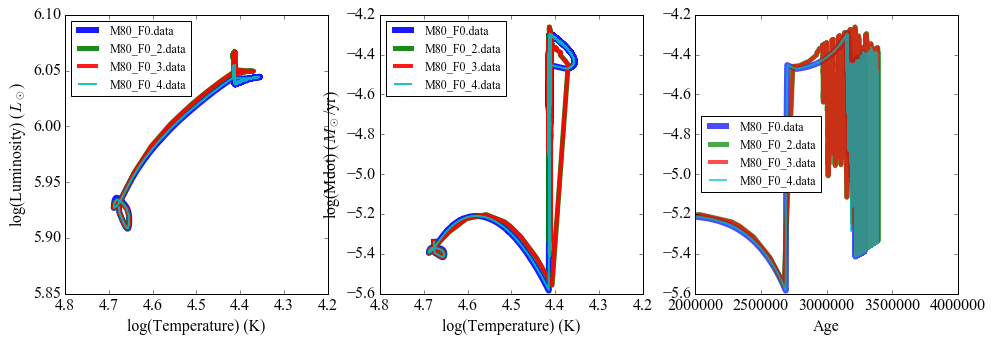

In [78]:
fig, ax = plt.subplots(1,3, figsize=(16,5))
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'Times New Roman'})

plt.ticklabel_format(style='sci', axis='xy', scilimits=(0,0))

ax[0].set_xlabel('log(Temperature) (K)')
ax[1].set_xlabel('log(Temperature) (K)')
ax[2].set_xlabel('Age')
ax[0].set_ylabel('log(Luminosity) ($L_\odot$)')
ax[1].set_ylabel('log(Mdot) ($M_\odot$/yr)')

ax[0].set_xlim(4.8,4.2)
ax[1].set_xlim(4.8,4.2)
ax[2].set_xlim(2e6,4e6)

ax[0].set_ylim(5.85,6.1)

models = ['M80_F0.data','M80_F0_2.data','M80_F0_3.data','M80_F0_4.data'
         # , 'M80_F0+LBV.data'
         ]
lw = [6,5,4,2,1]

for item in range(0, len(models)):
    
    data = read_model(models[item])
    ax[0].plot(data['log_Teff'], data['log_L'], label=models[item], lw=lw[item], alpha=0.9)
    ax[1].plot(data['log_Teff'],np.log10(np.absolute(data['star_mdot'])),label=models[item], lw=lw[item], alpha=0.9)
    ax[2].plot(data['star_age'],np.log10(np.absolute(data['star_mdot'])),label=models[item], lw=lw[item], alpha=0.7)

for item in ax:
    item.legend(fontsize=12, loc=0)

Zsolt need to comment on how these models' parameters differ.

# Figures that illustrate the change in mass-loss for a single mass

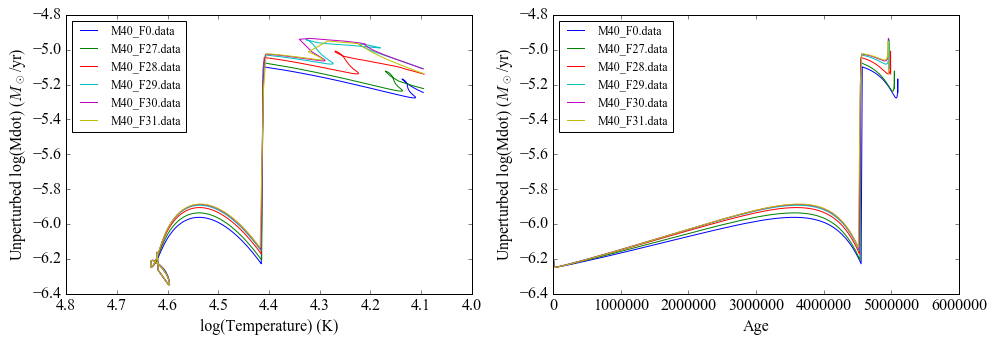

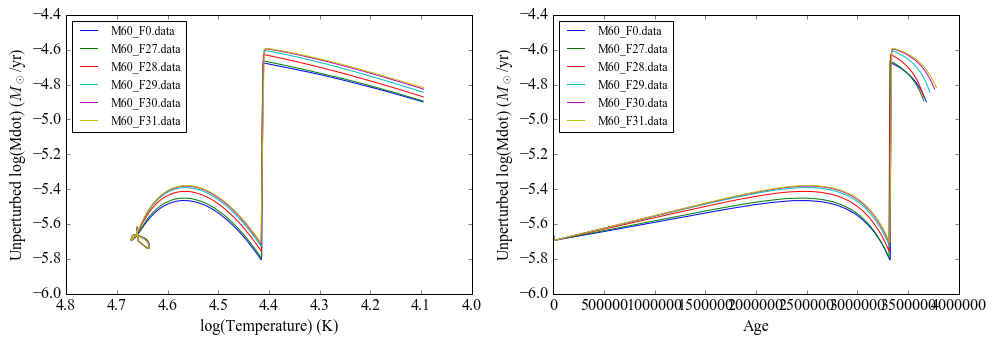

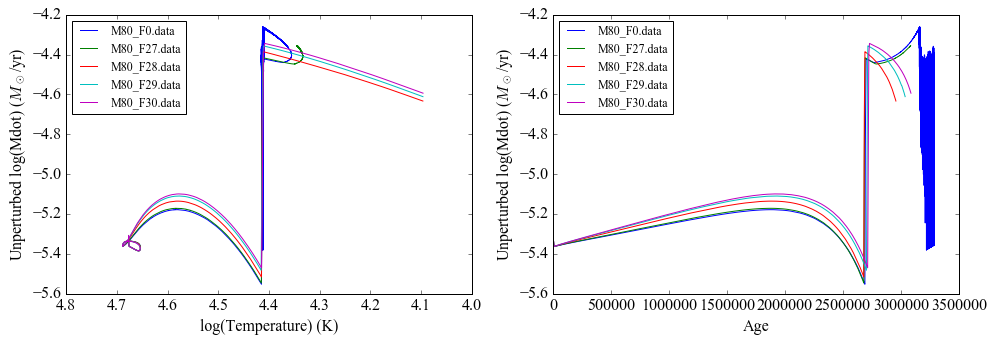

In [96]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'Times New Roman'})

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[0].set_xlabel('log(Temperature) (K)')
ax[0].set_xlim(4.8,4)
ax[1].set_xlabel('Age')

for item in ax:
    item.set_ylabel('Unperturbed log(Mdot) ($M_\odot$/yr)')

models = ['M40_F0.data','M40_F27.data','M40_F28.data','M40_F29.data','M40_F30.data','M40_F31.data']

for item in range(0, len(models)):
    
    data = read_model(models[item])
    ax[0].plot(data['log_Teff'],np.log10(np.absolute(data['star_mdot'])/data['f']), label=models[item], alpha=1)
    ax[1].plot(data['star_age'],np.log10(np.absolute(data['star_mdot'])/data['f']),label=models[item], alpha=1)

for item in ax:
    item.legend(fontsize=12, loc=0)
    

fig, ax = plt.subplots(1,2, figsize=(16,5))
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'Times New Roman'})

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[0].set_xlabel('log(Temperature) (K)')
ax[0].set_xlim(4.8,4)
ax[1].set_xlabel('Age')

for item in ax:
    item.set_ylabel('Unperturbed log(Mdot) ($M_\odot$/yr)')

models = ['M60_F0.data','M60_F27.data','M60_F28.data','M60_F29.data','M60_F30.data','M60_F31.data']

for item in range(0, len(models)):
    
    data = read_model(models[item])
    ax[0].plot(data['log_Teff'],np.log10(np.absolute(data['star_mdot'])/data['f']), label=models[item], alpha=1)
    ax[1].plot(data['star_age'],np.log10(np.absolute(data['star_mdot'])/data['f']),label=models[item], alpha=1)

for item in ax:
    item.legend(fontsize=12, loc=0)
    
fig, ax = plt.subplots(1,2, figsize=(16,5))
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'Times New Roman'})

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[0].set_xlabel('log(Temperature) (K)')
ax[0].set_xlim(4.8,4)
ax[1].set_xlabel('Age')

for item in ax:
    item.set_ylabel('Unperturbed log(Mdot) ($M_\odot$/yr)')

models = ['M80_F0.data','M80_F27.data','M80_F28.data','M80_F29.data','M80_F30.data']

for item in range(0, len(models)):
    
    data = read_model(models[item])
    ax[0].plot(data['log_Teff'],np.log10(np.absolute(data['star_mdot'])/data['f']), label=models[item], alpha=1)
    ax[1].plot(data['star_age'],np.log10(np.absolute(data['star_mdot'])/data['f']),label=models[item], alpha=1)

for item in ax:
    item.legend(fontsize=12, loc=0)


Here by "unperturbed", I mean the mass-loss calculated with the present parameters. There is a difference as the luminosity of the star is different.

In the 60 $M_\odot$ model, the magnetic model is always the one with the higher mass-loss (more luminous). For the 80 $M_\odot$ model, the highly magnetic model has a higher mass-loss, even after the jump (pink, cyan, and red curves). But the non-magnetic model and F27 model, the Mdot goes up with time when the temperature goes back to the blue. 

# Figures that illustrate the change in mass in HRD

0.5 1


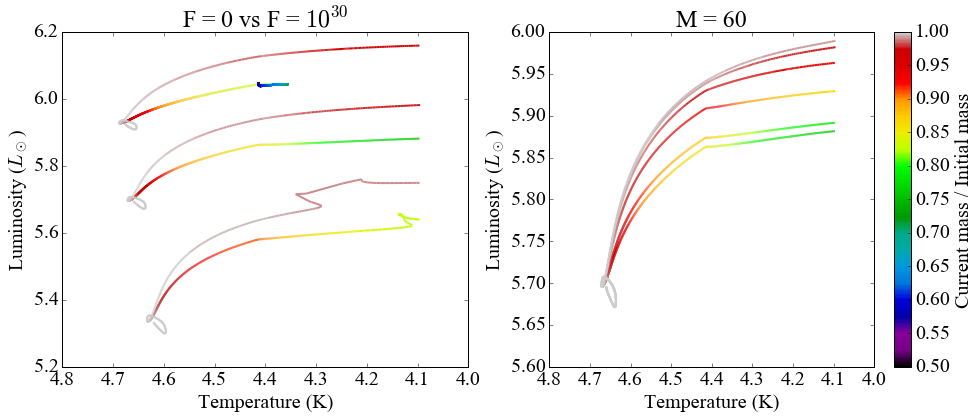

In [79]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity ($L_\odot$)')
plt.title('F = 0 vs F = $10^{30}$')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax1.set_xlim(4.8,4)
ax1.set_ylim(5.2,6.2)

ax2 = fig.add_subplot(1,2,2)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity ($L_\odot$)')
plt.title('M = 60')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax2.set_xlim(4.8,4)
ax2.set_ylim(5.6,6.0)


x = 'log_Teff'
y = 'log_L'
z = 'star_mass'

min_col=0.5
max_col=1
#min_col = test['f'].min()
#max_col = test['f'].max()
print min_col, max_col

cmap = 'spectral'

models = ['M40_F0.data', 'M40_F30.data', 'M60_F0.data', 'M60_F30.data', 'M80_F0.data','M80_F30.data']

for item in range(0, len(models)):
    
    data = read_model(models[item])
    lc = data_lines(data[x], data[y], data[z]/data[z][0], min_col, max_col, cmap)
    cax = ax1.add_collection(lc)

models = ['M60_F0.data', 'M60_F27.data','M60_F28.data','M60_F29.data','M60_F30.data', 'M60_F31.data' ]

for item in range(0, len(models)):
    
    data = read_model(models[item])
    lc = data_lines(data[x], data[y], data[z]/data[z][0], min_col, max_col, cmap)
    cax = ax2.add_collection(lc)


    
#cbar = fig.colorbar(cax, ticks=[min_col, max_col])
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('Current mass / Initial mass')

#cbar.ax.set_yticklabels(['< -1', '> 1'])  # vertically oriented colorbar



plt.savefig('HRD_mass.pdf', format='pdf')

0.5 1


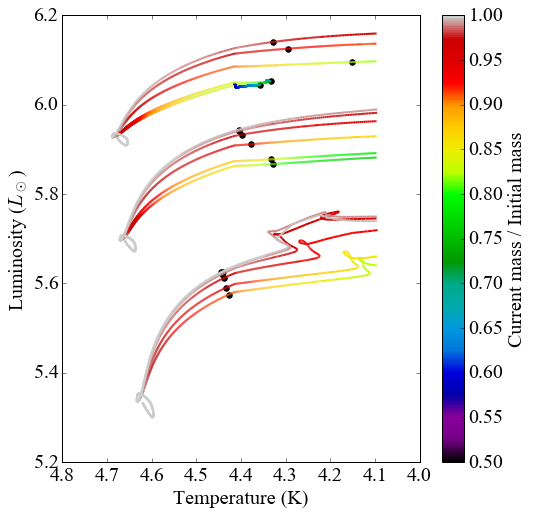

In [80]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity ($L_\odot$)')
#plt.title('F = 0 vs F = $10^{30}$')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax1.set_xlim(4.8,4)
ax1.set_ylim(5.2,6.2)

x = 'log_Teff'
y = 'log_L'
z = 'star_mass'

min_col=0.5
max_col=1
#min_col = test['f'].min()
#max_col = test['f'].max()
print min_col, max_col

cmap = 'spectral'

models = ['M40_F0.data','M40_F27.data','M40_F28.data','M40_F29.data','M40_F30.data','M40_F31.data',
          'M60_F0.data','M60_F27.data','M60_F28.data','M60_F29.data','M60_F30.data','M60_F31.data',
          'M80_F0.data','M80_F27.data','M80_F28.data','M80_F29.data','M80_F30.data']

for item in range(0, len(models)):
    
    data = read_model(models[item])
    lc = data_lines(data[x], data[y], data[z]/data[z][0], min_col, max_col, cmap)
    lc.set_zorder(20)
    cax = ax1.add_collection(lc)



#cbar = fig.colorbar(cax, ticks=[min_col, max_col])
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('Current mass / Initial mass')

ax1.scatter(temp_atH, lum_atH, c='k', s=30, zorder=1 )    

#cbar.ax.set_yticklabels(['< -1', '> 1'])  # vertically oriented colorbar



plt.savefig('HRD_mass_all.pdf', format='pdf')

From Zsolt: HRDs: I would recommend that we simply cut the post-MS for the 40 Msun models, and thus we don't have to bother with the strange behaviour.


# Illustration of the initial vs final mass?

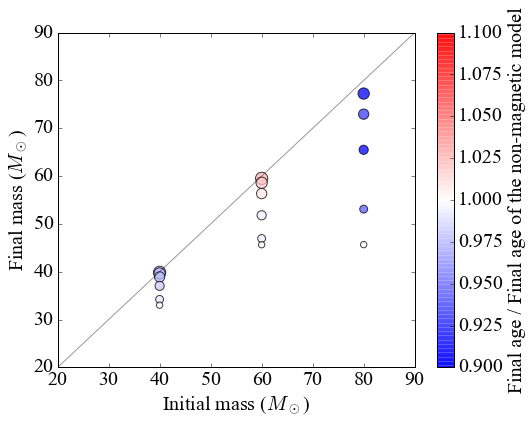

In [82]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('Initial mass ($M_\odot$)')
plt.ylabel('Final mass ($M_\odot$)')
#plt.title('F = 0 vs F = $10^{30}$')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.family': 'Times New Roman'})


ax1.set_xlim(20,90)
ax1.set_ylim(20,90)

cmap = 'bwr'

z = np.zeros(len(models))

z[0:6] = final_age[0:6]/final_age[0]
z[6:12] = final_age[6:12]/final_age[6]
z[12:16] = final_age[12:16]/final_age[12]



#z[6:12] = z[6:12]/z[6]
#z[12:16] = z[12:16]/z[12]

#print initial_mass[0:6]
#print initial_mass[6:7]
#

models = ['M40_F0.data','M40_F27.data','M40_F28.data','M40_F29.data','M40_F30.data','M40_F31.data',
          'M60_F0.data','M60_F27.data','M60_F28.data','M60_F29.data','M60_F30.data','M60_F31.data',
          'M80_F0.data','M80_F27.data','M80_F28.data','M80_F29.data','M80_F30.data']


size = 40 + 22*np.array([0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4])
ax1.plot([20,90],[20,90], c='k', alpha=0.4)

sc = ax1.scatter(initial_mass[::-1], final_mass[::-1], c=z[::-1], vmin=0.9, vmax=1.1, s=size[::-1], cmap=plt.cm.get_cmap(cmap), alpha=0.75)
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Final age / Final age of the non-magnetic model')


plt.savefig('MassMass_age.pdf', format='pdf')

Find a better name than "final mass".  From Zsolt: I was thinking that this would be even more informative if we could connect the 40-60-80 models with the same magnetic field strength,i.e. sort of isomagnetic lines.

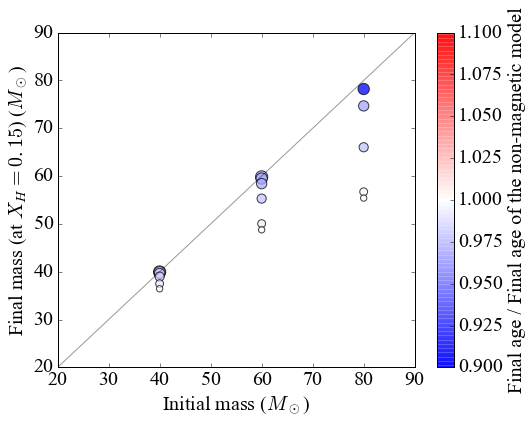

In [83]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('Initial mass ($M_\odot$)')
plt.ylabel('Final mass (at $X_H=0.15$) ($M_\odot$)')
#plt.title('F = 0 vs F = $10^{30}$')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.family': 'Times New Roman'})


ax1.set_xlim(20,90)
ax1.set_ylim(20,90)

cmap = 'bwr'

z = np.zeros(len(models))

z[0:6] = age_atH[0:6]/age_atH[0]
z[6:12] = age_atH[6:12]/age_atH[6]
z[12:16] = age_atH[12:16]/age_atH[12]



#z[6:12] = z[6:12]/z[6]
#z[12:16] = z[12:16]/z[12]

#print initial_mass[0:6]
#print initial_mass[6:7]
#

models = ['M40_F0.data','M40_F27.data','M40_F28.data','M40_F29.data','M40_F30.data','M40_F31.data',
          'M60_F0.data','M60_F27.data','M60_F28.data','M60_F29.data','M60_F30.data','M60_F31.data',
          'M80_F0.data','M80_F27.data','M80_F28.data','M80_F29.data','M80_F30.data']


size = 40 + 22*np.array([0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4])
ax1.plot([20,90],[20,90], c='k', alpha=0.4)

sc = ax1.scatter(initial_mass[::-1], mass_atH[::-1], c=z[::-1], vmin=0.9, vmax=1.1, s=size[::-1], cmap=plt.cm.get_cmap(cmap), alpha=0.75)
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Final age / Final age of the non-magnetic model')


plt.savefig('MassMass_age_atH.pdf', format='pdf')

# Field strength

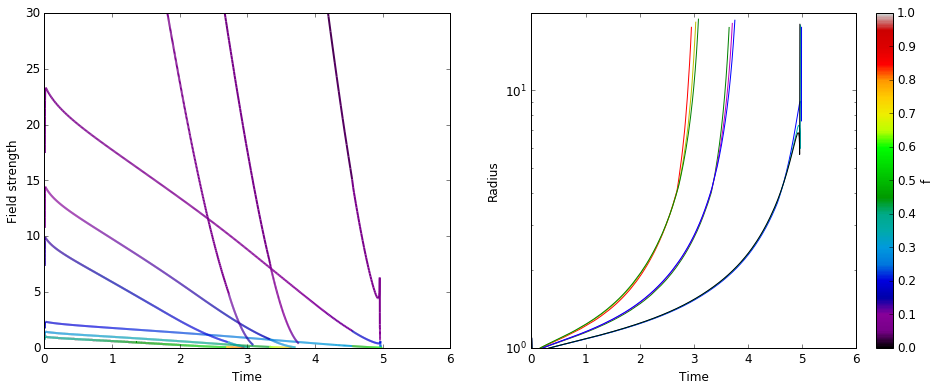

In [188]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
plt.xlabel('Time')
plt.ylabel('Field strength')
#plt.title('F = 0 vs F = $10^{30}$')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.family': 'Times New Roman'})
#plt.yscale('log')
ax1.set_xlim(0,6)
ax1.set_ylim(0,30)


ax2 = fig.add_subplot(1,2,2)
plt.xlabel('Time')
plt.ylabel('Radius')
#plt.title('F = 0 vs F = $10^{30}$')
plt.rcParams.update({'font.size': 12})
plt.yscale('log')
ax2.set_xlim(0,6)
ax2.set_ylim(1,20)

cmap = 'spectral'
min_col=0.0
max_col=1.0


#models = ['M40_F0.data','M40_F27.data','M40_F28.data','M40_F29.data','M40_F30.data','M40_F31.data']
#          'M60_F0.data','M60_F27.data','M60_F28.data','M60_F29.data','M60_F30.data','M60_F31.data',
#          'M80_F0.data',               'M80_F28.data','M80_F29.data','M80_F30.data']

models = ['M40_F28.data','M60_F28.data','M80_F28.data',
          'M40_F29.data','M60_F29.data','M80_F29.data',
          'M40_F30.data','M60_F30.data','M80_F30.data']

for item in range(0, len(models)):
    
    data = read_model(models[item])
    lc = data_lines(data['star_age']/1e6, data['Bp']/1e3, data['f'], min_col, max_col, cmap)
    cax = ax1.add_collection(lc)
    
    
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('f')

for item in range(0, len(models)):
    
    data = read_model(models[item])
    ax2.plot(data['star_age']/1e6, 10**(data['log_R']-data['log_R'][0]))
    


#plt.savefig('Field.pdf', format='pdf')

# Center H1

0 1


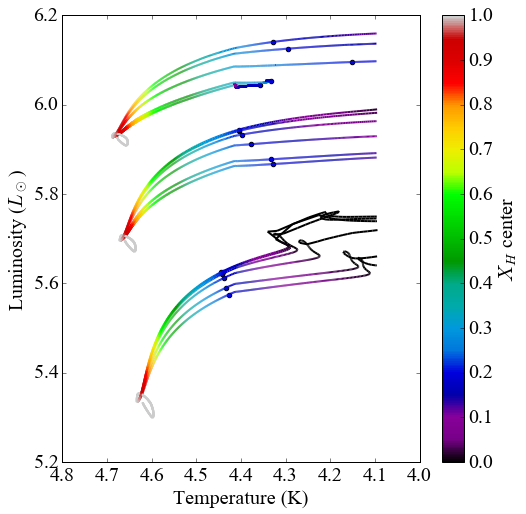

In [84]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity ($L_\odot$)')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax1.set_xlim(4.8,4)
ax1.set_ylim(5.2,6.2)

x = 'log_Teff'
y = 'log_L'
z = 'center_h1'

min_col=0
max_col=1
#min_col = test['f'].min()
#max_col = test['f'].max()
print min_col, max_col

cmap = 'spectral'

models = ['M40_F0.data','M40_F27.data','M40_F28.data','M40_F29.data','M40_F30.data','M40_F31.data',
          'M60_F0.data','M60_F27.data','M60_F28.data','M60_F29.data','M60_F30.data','M60_F31.data',
          'M80_F0.data','M80_F27.data','M80_F28.data','M80_F29.data','M80_F30.data']

#models = ['M40_F0.data', 'M40_F30.data', 'M60_F0.data', 'M60_F30.data', 'M80_F0.data','M80_F30.data']

        
for item in range(0, len(models)):
    
    data = read_model(models[item])
    lc = data_lines(data[x], data[y], data[z]/data[z][0], min_col, max_col, cmap)
    cax = ax1.add_collection(lc)

    
#cbar = fig.colorbar(cax, ticks=[min_col, max_col])
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('$X_H$ center')

#cbar.ax.set_yticklabels(['< -1', '> 1'])  # vertically oriented colorbar

ax1.scatter(temp_atH, lum_atH ) 

plt.savefig('HRD_Hcenter.pdf', format='pdf')




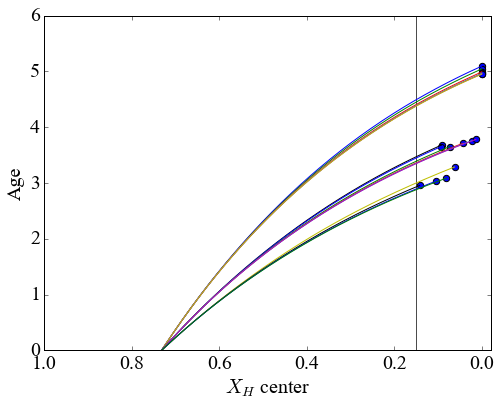

In [252]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('$X_H$ center')
plt.ylabel('Age')
#plt.title('F = 0 vs F = $10^{30}$')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.family': 'Times New Roman'})
#plt.yscale('log')
ax1.set_xlim(1,-0.02)
ax1.set_ylim(0,6)




#cmap = 'spectral'
#min_col=0.0
#max_col=1.0


models = ['M40_F0.data','M40_F27.data','M40_F28.data','M40_F29.data','M40_F30.data','M40_F31.data',
          'M60_F0.data','M60_F27.data','M60_F28.data','M60_F29.data','M60_F30.data','M60_F31.data',
          'M80_F0.data',               'M80_F28.data','M80_F29.data','M80_F30.data']

#models = ['M40_F28.data','M60_F28.data','M80_F28.data',
#          'M40_F29.data','M60_F29.data','M80_F29.data',
#          'M40_F30.data','M60_F30.data','M80_F30.data']


ax1.plot([0.15, 0.15], [0,6], c='k', alpha=0.7)
for item in range(0, len(models)):
    
    data = read_model(models[item])
    ax1.plot(data['center_h1'], data['star_age']/1e6)

sc = ax1.scatter(final_Hcenter, final_age/1e6, s=40)
    
    

size = 40 + 22*np.array([0,1,2,3,4,5,0,1,2,3,4,5,0,2,3,4])
sc = ax2.scatter(final_Hcenter, final_age/1e6, s=40)

plt.savefig('HRD_Age_Hcenter.pdf', format='pdf')

In [85]:
print final_Hcenter
print final_age


[  0.00000000e+00   1.21013112e-99   1.04200537e-99   1.05318595e-99
   1.11619163e-99   1.21573489e-99   9.21376910e-02   9.27915383e-02
   7.30957619e-02   4.29913196e-02   2.25046972e-02   1.36968997e-02
   6.22573531e-02   1.21778421e-01   1.42109568e-01   1.03731665e-01
   8.12058682e-02]
[ 5098474.22172832  5048040.87597394  4991911.53751705  4970421.44746665
  4961673.23326014  4958280.01121306  3679312.40693805  3653193.19111528
  3653732.56670727  3712771.03783596  3759805.44803227  3780321.70245468
  3287469.45496042  3083831.08630573  2956733.95811479  3036541.36135076
  3086590.63687581]
